# Basic DSP Simulations

#### FFT and Windowing computation

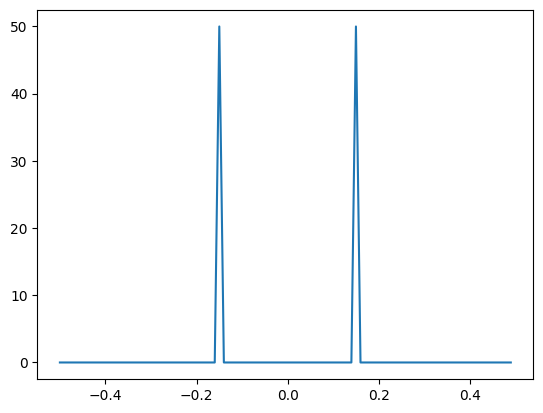

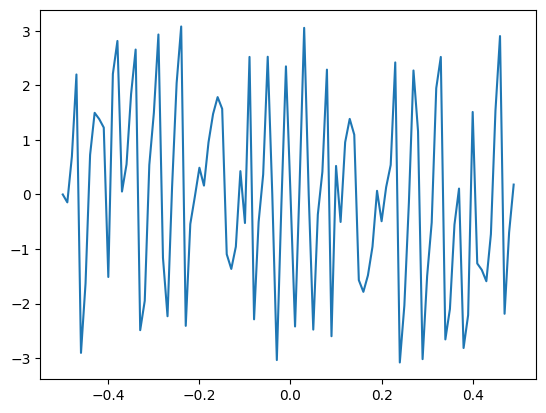

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c

Fs = 1
N = 100  # Number of point
t = np.arange(N)

s = np.sin(0.15*2*np.pi*t)
#s = s * np.blackman(N)   #np.hanning() np.hamming()
S = np.fft.fftshift(np.fft.fft(s))
S_mag = np.abs(S)
S_phase = np.angle(S)
f = np.arange(-Fs/2,Fs/2,Fs/N)
plt.figure(0)
plt.plot(f,S_mag)
plt.figure(1)
plt.plot(f, S_phase)
plt.show()

Calculating Average Power

P = $\frac{1}{N}$ $\sum_{n=0}^{N-1}$ $|x[n]|^2$
In python: avg_pw = np.mean(np.abs(x)**2).
If the signal has roughly zero mean, avg_pw = np.var(x).

## Calculating Power Spectral Density

Text(0, 0.5, 'Magnitude [dB]')

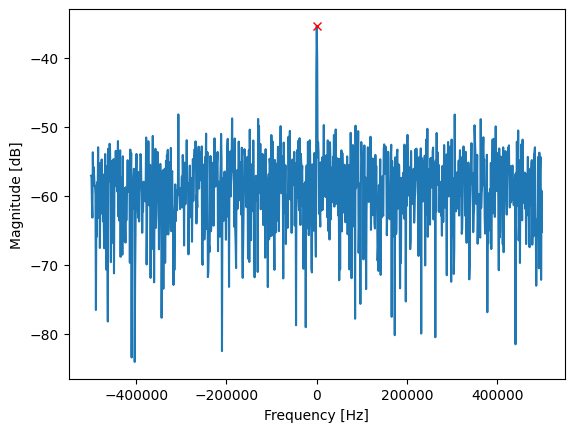

In [3]:
# Calculating Power Spectral Density
Fs = 1e6  #Sampling frequency
Ts = 1/Fs # Sample period
N = 1024  # number of sample to simulate
t = Ts * np.arange(N)
x = np.exp(1j * 2*np.pi * 50 * t)   # simulate sinusoid of 50 Hz
x = x[0:N]
x = x * np.hanning(len(x))

n = (np.random.randn(N) + 1j*np.random.randn(N))/np.sqrt(2) # complex noise with unity power
noise_power = 2
r = x + n * np.sqrt(noise_power)

# Take the magnitude of the FFT output, which provides us 1024 real floats.
# Square the resulting magnitude to get power.
# Normalize: divide by the FFT size (N) and sample rate (Fs).
PSD = np.abs(np.fft.fft(r))**2 / (N*Fs)
PSD_log = 10.0*np.log10(PSD)    #Convert to dB using 10log10(); we always view PSDs in log scale.
# Perform an FFT shift, to move “0 Hz” in the center and negative frequencies to the left of center.
PSD_shiffted = np.fft.fftshift(PSD_log)

f = np.arange(-Fs/2, Fs/2, Fs/N)
plt.plot(f,PSD_shiffted)
plt.plot(f[np.argmax(PSD_shiffted)], np.max(PSD_shiffted), 'rx')  # Show max
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
#plt.grid

### Generating QPSK at baseband and plot the constellation

#### Generate QPSK no noise signal

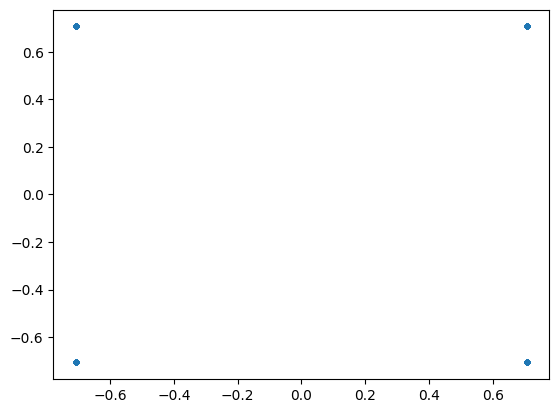

In [5]:
num_symbols = 10000

z_int = np.random.randint(0, 4, num_symbols) # 0 to 3
z_degrees = z_int*360/4.0 + 45 # 45, 135, 225, 315 degrees
z_radians = z_degrees*np.pi/180.0 # sin() and cos() takes in radians
z_symbols = np.cos(z_radians) + 1j*np.sin(z_radians) # this produces our QPSK complex symbols
plt.plot(np.real(z_symbols), np.imag(z_symbols), '.')
#plt.grid(True)
plt.show()

#### Let's add noise to the above signal.

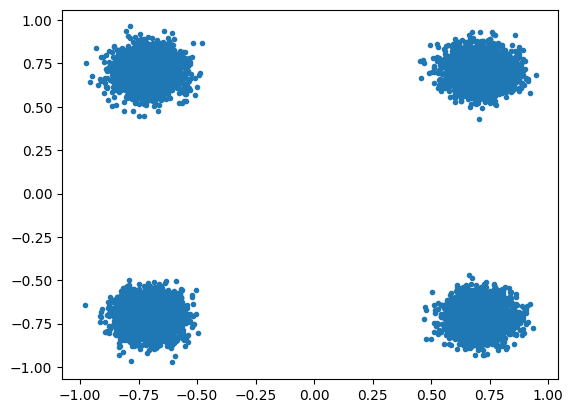

In [6]:
n = (np.random.randn(num_symbols) + 1j*np.random.randn(num_symbols))/np.sqrt(2) # AWGN with unity power
noise_power = 0.01
r = z_symbols + n * np.sqrt(noise_power)
plt.plot(np.real(r), np.imag(r), '.')
#plt.grid(True)
plt.show()

#### Phase Noise
Phase jitter can be caused by the local oscillator.Example from the above:

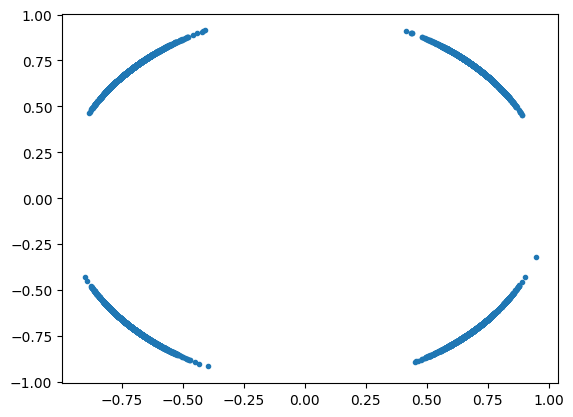

In [7]:
phase_noise = np.random.randn(len(z_symbols)) * 0.1 # multiplier for "strength" of phase noise
r = z_symbols * np.exp(1j*phase_noise)
plt.plot(np.real(r), np.imag(r), '.')
#plt.grid(True)
plt.show()

### Simulating Rayleigh Fading
Rayleigh fading is used to model fading over time when there is no significant LOS path. When LOS path is dominant, Rician fading model is suitable. As a result of movement and scatterers in the environment, Rayleigh models the multipath fading that occurs over time.

To generate a Rayleigh fading channel, first specify the max Doppler shift  in Hz, which is based on how fast the transmitter and or receiver is moving, denoted $\Delta v$. The Doppler shift is as: $f_D = \frac{\Delta v}{c} * f_c $ where $c$  is the speed of light and $f_c$ the carrier frequency being transmitted on. Using Clark\'s method, Rayleigh fading channel can be as:

max Doppler shift: 17.89397917408583


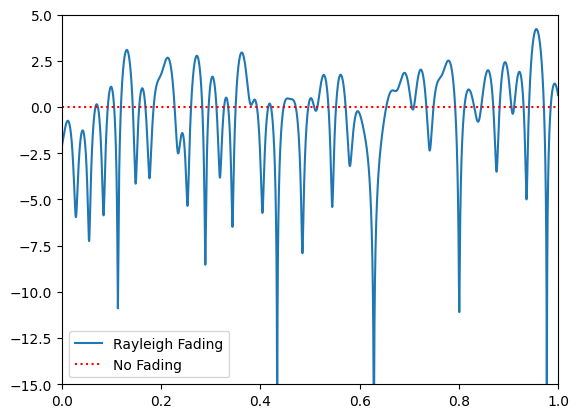

In [9]:
v_mph = 60 # velocity of either TX or RX, in miles per hour
carrier_freq = 200e6 # RF carrier frequency in Hz
Fs = 1e5 # sample rate of simulation
N = 100 # number of sinusoids to sum

v = v_mph * 0.44704 # convert to m/s
f_d = v*carrier_freq/c # max Doppler shift
print("max Doppler shift:", f_d)
t = np.arange(0, 1, 1/Fs) # time vector. (start, stop, step)
x = np.zeros(len(t))
y = np.zeros(len(t))
for i in range(N):
    alpha = (np.random.rand() - 0.5) * 2 * np.pi
    phi = (np.random.rand() - 0.5) * 2 * np.pi
    x = x + np.random.randn() * np.cos(2 * np.pi * f_d * t * np.cos(alpha) + phi)
    y = y + np.random.randn() * np.sin(2 * np.pi * f_d * t * np.cos(alpha) + phi)

# z is the complex coefficient representing channel, think of it as a phase shift and magnitude scale
z = (1/np.sqrt(N)) * (x + 1j*y) # this is what to actually use when simulating the channel
z_mag = np.abs(z) # take magnitude for the sake of plotting
z_mag_dB = 10*np.log10(z_mag) # convert to dB

# Plot fading over time
plt.plot(t, z_mag_dB)
plt.plot([0, 1], [0, 0], ':r') # 0 dB
plt.legend(['Rayleigh Fading', 'No Fading'])
plt.axis([0, 1, -15, 5])
plt.show()